# Imports importantes

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from nn.mlp import MLP
from nn.knn import KNN
from util.plotutils import predict, plot_decision_boundary
from util.data_loader import data_loader
from random import randint

# Dataset Iris
O dataset da iris é um dos mais conhecidos na área de ML. A base deste dataset é composta por três conjuntos de flores, Iris setosa, Iris versicolor e Iris virgínica. Cada conjunto possui 4 medidas, sendo elas tamanho e largura da pétala e tamanho e largura da sépala. O dataset utilizado neste exercício contém 150 amostras, onde iremos utilizar 80% destas amostras para treinamento, e os outros 20% para teste.

# Carregamento dos dados

In [2]:
iris = load_iris()

# Separação dos dados e das classes

In [3]:
targets = iris.data  # 4 parametros
labels = iris.target

# Definição de hiper parâmetros

In [4]:
input_layer = targets.shape[1]
hidden_layer = 1000
output_layer = len(torch.unique(torch.from_numpy(labels)))
epochs = 300
lr = 1e-3

In [5]:
train_loader, test_loader = data_loader(targets, labels)
train_targets, train_labels = train_loader.dataset.tensors[0], train_loader.dataset.tensors[1]
test_targets, test_labels = test_loader.dataset.tensors[0], test_loader.dataset.tensors[1]

# Treinando o modelo e calculando a taxa de acerto

In [6]:
model = MLP(input_layer, hidden_layer, output_layer, epochs, lr, train_loader, test_loader)
model.fit(last_epoch=True)

Epoch:  300 | Loss:  0.029 | Acc:  96.67% 


# Plotando região de decisão (para problemas pertencente ao R²)

In [7]:
plot_decision_boundary(lambda x : predict(x, clf=model) , targets, labels)  # plota se X.shape[1] == 2

# Evolução da função custo por época

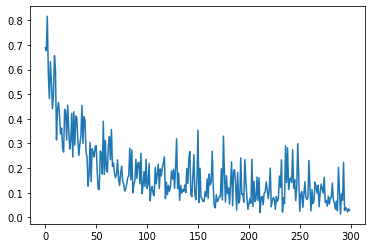

In [8]:
plt.plot(range(model.epochs), model.loss_per_epoch)
plt.show()

# Evolução da função custo por iteração

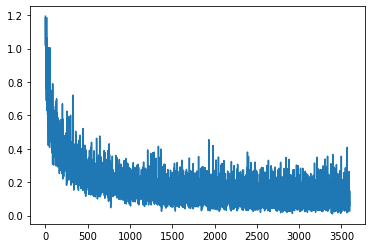

In [9]:
plt.plot(range(len(model.loss_per_iter)), model.loss_per_iter)
plt.show()

# Iniciando o modelo KNN

In [10]:
k = 5
knn = KNN(k, train_targets, train_labels)

In [11]:
labels_predicted = knn.predict(test_targets)

In [12]:
hit = (labels_predicted == test_labels).sum().float()
hit = 100 * hit.item() / test_labels.shape[0]
print(f'Taxa de acerto do modelo KNN para K = {k}, {hit: .2f}%')

Taxa de acerto do modelo KNN para K = 5,  96.67%


# Analisando taxa de acerto do modelo
Durante alguns testes, percebemos que o modelo KNN, quando treiando com os quatro parâmetros da iris, tende a manter uma taxa alta de acerto quando o K está dentro do intervalo de 1 à 80, valores  acima de 80 fazem a taxa de acerto do modelo diminuir drasticamente.
Obs: Este padrão pode variar de acordo com a separação (aleatória) dos dados.

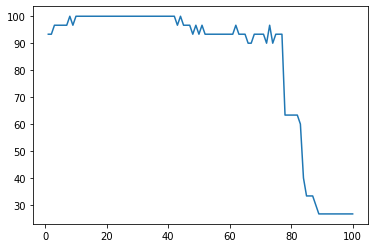

In [13]:
total = []
for k_ in range(1, 101):
    knn = KNN(k_, train_targets, train_labels)
    labels_predicted = knn.predict(test_targets)
    hit = (labels_predicted == test_labels).sum().float()
    total.append(100 * hit.item() / test_labels.shape[0])
plt.plot(range(1, 101), total)

# Treinamento da rede MLP 
A rede será treinada variando suas camadas ocultas, sua taxa de aprendizado e suas épocas, além de ser treinado e testado em subconjuntos do dataset da iris.

Pair : [0, 1] | Hidden:  1498 | lr:  0.0100 |  Epoch:  93 | Loss:  2.266 | Acc:  73.33% 


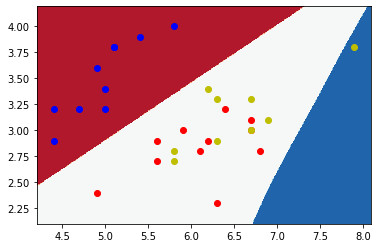

Pair : [0, 2] | Hidden:  166 | lr:  0.0001 |  Epoch:  233 | Loss:  0.442 | Acc:  80.00% 


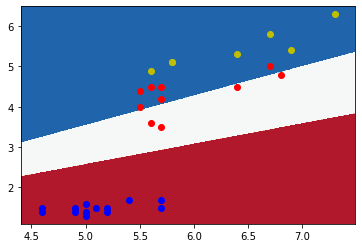

Pair : [0, 3] | Hidden:  2523 | lr:  0.1000 |  Epoch:  114 | Loss:  0.053 | Acc:  86.67% 


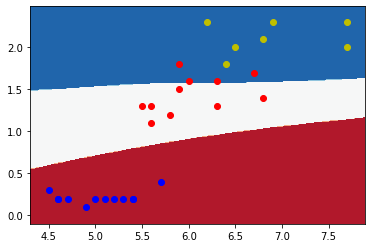

Pair : [1, 2] | Hidden:  2679 | lr:  0.0010 |  Epoch:  254 | Loss:  0.294 | Acc:  86.67% 


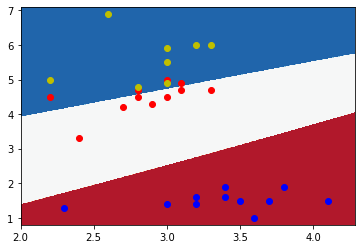

Pair : [1, 3] | Hidden:  2890 | lr:  0.0001 |  Epoch:  213 | Loss:  0.159 | Acc:  90.00% 


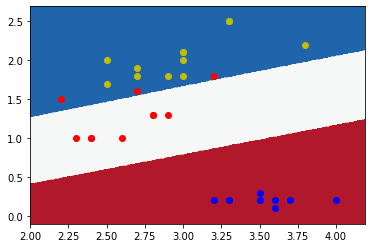

Pair : [2, 3] | Hidden:  2413 | lr:  0.0100 |  Epoch:  295 | Loss:  1.745 | Acc:  83.33% 


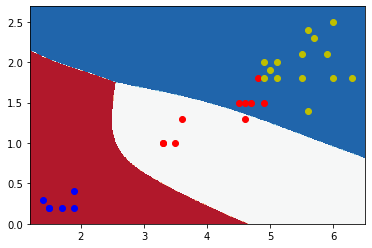

In [14]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    targets = iris.data[:, pair]
    labels = iris.target
    
    input_layer = targets.shape[1]
    hidden_layer = randint(1, 3000)
    output_layer = len(torch.unique(torch.from_numpy(labels)))
    epochs = randint(50, 300)
    lr = 1 * 10 ** randint(-4, -1)
    print(f'Pair : {pair} | Hidden: {hidden_layer: 2d} | lr: {lr: .4f}', end=' |  ')

    
    train_loader, test_loader = data_loader(targets, labels)
    _targets, _labels = test_loader.dataset.tensors[0], test_loader.dataset.tensors[1]
    
    model = MLP(input_layer, hidden_layer, output_layer, epochs, lr, train_loader, test_loader)
    model.fit(last_epoch=True)
    
    plot_decision_boundary(lambda x : predict(x, clf=model) , _targets, _labels)

# Autores
- **Christiano Machado** @ https://github.com/chrismachado
- **Vitor Veras** @ https://github.com/vitorverasm
